In [4]:
import torch
from torch import nn


In [15]:
X = torch.arange(100, 200)
y = 0.3*X + 0.5

X_train, y_train, X_test, y_test = X[:80], y[:80], X[80:], y[80:]

In [16]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([80]), torch.Size([80]), torch.Size([20]), torch.Size([20]))

In [68]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

In [5]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float, requires_grad= True)) # requires_grad= True by default for parameter
        self.bias = nn.Parameter(torch.randn(1, dtype = torch.float, requires_grad= True))

    def forward(self, x : torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias


In [ ]:
linear_model = LinearRegression()
loss_fn = nn.L1Loss()
optimizer = torch.optim.AdamW(params = linear_model.parameters(), lr = 0.001)

epochs = 10000

for epoch in range(epochs):
    linear_model.train()
    
    y_pred = linear_model(X_train)
    loss = loss_fn(y_train, y_pred)
    if epoch % 2000 == 0:
        print(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    linear_model.eval()


tensor(180.4766, grad_fn=<MeanBackward0>)
tensor(0.0548, grad_fn=<MeanBackward0>)
tensor(0.0218, grad_fn=<MeanBackward0>)
tensor(0.0065, grad_fn=<MeanBackward0>)
tensor(0.0076, grad_fn=<MeanBackward0>)


In [55]:
list(linear_model.parameters())

[Parameter containing:
 tensor([0.2999], requires_grad=True),
 Parameter containing:
 tensor([0.4988], requires_grad=True)]

In [56]:
linear_model.state_dict()

OrderedDict([('weights', tensor([0.2999])), ('bias', tensor([0.4988]))])

In [57]:
with torch.inference_mode():
    y_preds = linear_model(X_test)

In [58]:
y_preds

tensor([54.4828, 54.7827, 55.0826, 55.3825, 55.6824, 55.9823, 56.2822, 56.5821,
        56.8821, 57.1820, 57.4819, 57.7818, 58.0817, 58.3816, 58.6815, 58.9814,
        59.2813, 59.5813, 59.8812, 60.1811])

In [59]:
y_test

tensor([54.5000, 54.8000, 55.1000, 55.4000, 55.7000, 56.0000, 56.3000, 56.6000,
        56.9000, 57.2000, 57.5000, 57.8000, 58.1000, 58.4000, 58.7000, 59.0000,
        59.3000, 59.6000, 59.9000, 60.2000])

## Saving and Loading
* torch.save()
* torch.load()
* torch.nn.Module.load_state_dict()

In [61]:
SAVE_PATH = "./saved_models/linear_model.pth"

In [62]:
torch.save(linear_model.state_dict(), SAVE_PATH) # will save only the state_dict, not the architecture

In [63]:
loaded_model = LinearRegression()
loaded_model.load_state_dict(torch.load(SAVE_PATH))

<All keys matched successfully>

In [64]:
loaded_model.state_dict()

OrderedDict([('weights', tensor([0.2999])), ('bias', tensor([0.4988]))])

In [65]:
loaded_model.eval()

LinearRegression()

In [66]:
with torch.inference_mode():
    preds = loaded_model(X_test)

In [67]:
preds

tensor([54.4828, 54.7827, 55.0826, 55.3825, 55.6824, 55.9823, 56.2822, 56.5821,
        56.8821, 57.1820, 57.4819, 57.7818, 58.0817, 58.3816, 58.6815, 58.9814,
        59.2813, 59.5813, 59.8812, 60.1811])

## Builtin Module

In [93]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(in_features=1, out_features=1)
    
    def forward(self, x : torch.Tensor) -> torch.Tensor:
        return self.linear(x)

torch.manual_seed(42)
model = LinearRegression()
model.to(device)
model, model.state_dict()




(LinearRegression(
   (linear): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear.weight', tensor([[0.7645]], device='cuda:0')),
              ('linear.bias', tensor([0.8300], device='cuda:0'))]))

In [94]:
next(model.parameters()).device

device(type='cuda', index=0)

In [95]:
X = torch.arange(100, 200, dtype=torch.float32)  
y = 0.3 * X + 0.5

X_train, y_train = X[:80].unsqueeze(1), y[:80].unsqueeze(1)
X_test, y_test = X[80:].unsqueeze(1), y[80:].unsqueeze(1)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

torch.Size([80, 1]) torch.Size([20, 1]) torch.Size([80, 1]) torch.Size([20, 1])


In [96]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.AdamW(params = model.parameters(), lr = 0.001)

X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)


epochs = 1000

for epoch in range(epochs):
    model.train()

    preds = model(X_train)
    loss = loss_fn(preds, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.inference_mode():
        y_pred_test = model(X_test)
        test_loss = loss_fn(y_pred_test, y_test)
    if epoch % 100 == 0:
        print(f"EPOCH {epoch} | Train Loss {loss} | Test Loss {test_loss}")

EPOCH 0 | Train Loss 65.13313293457031 | Test Loss 88.1681137084961
EPOCH 100 | Train Loss 50.98269271850586 | Test Loss 68.98213195800781
EPOCH 200 | Train Loss 36.84642791748047 | Test Loss 49.81538009643555
EPOCH 300 | Train Loss 22.72429656982422 | Test Loss 30.667800903320312
EPOCH 400 | Train Loss 8.616317749023438 | Test Loss 11.539401054382324
EPOCH 500 | Train Loss 0.024572277441620827 | Test Loss 0.0065399170853197575
EPOCH 600 | Train Loss 0.016981815919280052 | Test Loss 0.03638343885540962
EPOCH 700 | Train Loss 0.014677715487778187 | Test Loss 0.03142223507165909
EPOCH 800 | Train Loss 0.012144518084824085 | Test Loss 0.02633838728070259
EPOCH 900 | Train Loss 0.009381723590195179 | Test Loss 0.02034606970846653


In [97]:
model.eval()
with torch.inference_mode():
    preds = model(X_test)

In [98]:
preds

tensor([[54.5109],
        [54.8112],
        [55.1115],
        [55.4118],
        [55.7121],
        [56.0125],
        [56.3128],
        [56.6131],
        [56.9134],
        [57.2137],
        [57.5140],
        [57.8143],
        [58.1146],
        [58.4150],
        [58.7153],
        [59.0156],
        [59.3159],
        [59.6162],
        [59.9165],
        [60.2168]], device='cuda:0')

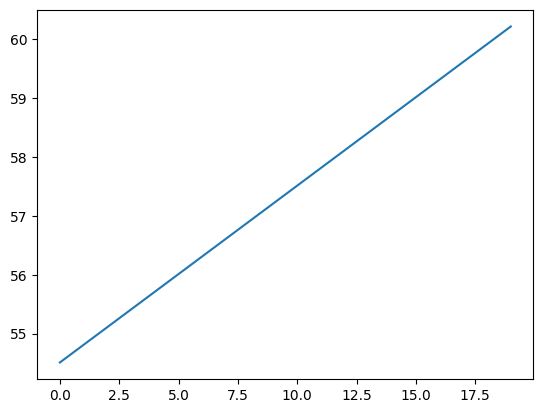

In [104]:
import matplotlib.pyplot as plt

plt.plot(preds.cpu())